In [10]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation


Using TensorFlow backend.


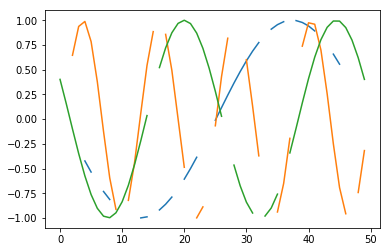

In [26]:
# defining dataset
# 3 sequences
# possible missing data
# classes - three phase combination or not
#
# 50 samples
# cycles can be 1 - 4
# offset can be any
# phase offset can be zero, 120, 240
t=np.linspace(0,2*np.pi,50)
def generate(c,o):
    return np.sin(t*c+o)

a=generate(2,0)
b=generate(2,2*np.pi/3)
c=generate(2,4*np.pi/3)

def makedatum(valid):
    z=np.zeros((50,6))
    if valid:
        c=int(np.round(1+np.random.rand()*3))
        o=np.random.rand()*2*np.pi
        z[:,0]=np.sin(t*c+o)
        z[:,1]=np.sin(t*c+o+2*np.pi/3)
        z[:,2]=np.sin(t*c+o+4*np.pi/3)
    else:
        for i in [0,1,2]:
           c=int(np.round(1+np.random.randint(4)))
           o=np.random.rand()*2*np.pi
           z[:,i]=np.sin(t*c+o)
    z[:,3:6]=np.random.randint(4,size=(50,3))
    for i in [0,1,2]:
        z[z[:,3+i]==0,i]=0
        z[z[:,3+i]>0,3+i]=1
    return z        

q=makedatum(False)
for i in [0,1,2]:
        q[q[:,3+i]==0,i]=np.nan
plt.plot(q[:,0])
plt.plot(q[:,1])
plt.plot(q[:,2])


In [27]:
xtrain=np.zeros((1000,50*6))
ytrain=np.zeros((1000,1))
for i in range(1000):
    ytrain[i]=np.random.randint(2)
    xtrain[i,:]=makedatum(ytrain[i]>0).ravel()
    


In [28]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=50*6))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [29]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(xtrain, ytrain, epochs=10, batch_size=32)


Epoch 1/10
1000/1000 [==============================] - 0s 84us/step - loss: 0.6869 - acc: 0.5840
Epoch 2/10
1000/1000 [==============================] - 0s 35us/step - loss: 0.5770 - acc: 0.7380
Epoch 3/10
1000/1000 [==============================] - 0s 29us/step - loss: 0.5106 - acc: 0.7920
Epoch 4/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.4354 - acc: 0.8620
Epoch 5/10
1000/1000 [==============================] - 0s 36us/step - loss: 0.3709 - acc: 0.8970
Epoch 6/10
1000/1000 [==============================] - 0s 32us/step - loss: 0.3098 - acc: 0.9350
Epoch 7/10
1000/1000 [==============================] - 0s 44us/step - loss: 0.2610 - acc: 0.9570
Epoch 8/10
1000/1000 [==============================] - 0s 32us/step - loss: 0.2139 - acc: 0.9740
Epoch 9/10
1000/1000 [==============================] - 0s 28us/step - loss: 0.1751 - acc: 0.9840
Epoch 10/10
1000/1000 [==============================] - 0s 29us/step - loss: 0.1419 - acc: 0.9910


In [30]:
xtest=np.zeros((1000,50*6))
ytest=np.zeros((1000,1))
for i in range(1000):
    ytest[i]=np.random.randint(2)
    xtest[i,:]=makedatum(ytest[i]>0).ravel()


In [33]:
model.predict(xtest[:10,:])

array([[ 0.23741546],
       [ 0.26168081],
       [ 0.92593694],
       [ 0.97250676],
       [ 0.91966718],
       [ 0.07737382],
       [ 0.97187287],
       [ 0.02910854],
       [ 0.07339688],
       [ 0.27905723]], dtype=float32)

In [34]:
ytest[:10]

array([[ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [21]:
model.evaluate(xtest,ytest,batch_size=32)

1000/1000 [==============================] - 0s 32us/step


[0.039556739062070849, 0.995]